In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
%matplotlib inline

In [2]:
data=pd.read_csv(r'D:\pandasdataset\project\bank_marketing.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
total=data.isnull().sum()
percent=(data.isnull().sum()/data.isnull().count())
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data

,total,percent
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
day,0,0.0


### Exploring target variable

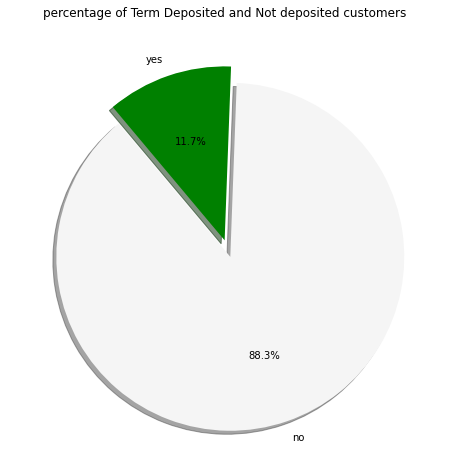

In [6]:
labels=data['y'].value_counts(sort=True).index
sizes=data['y'].value_counts(sort=True)
colors=['whitesmoke','green']
explode=(0.1,0)
rcParams['figure.figsize']=8,8
#plotting pie chart
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=130,)
plt.title('percentage of Term Deposited and Not deposited customers')
plt.show()

#### lets label encode target variable for data exploration

In [7]:
#creating 'y' column binary
data['y'] = data['y'].map(lambda s :1  if s =='yes' else 0)

### Let's analyse variables esribing bank clients

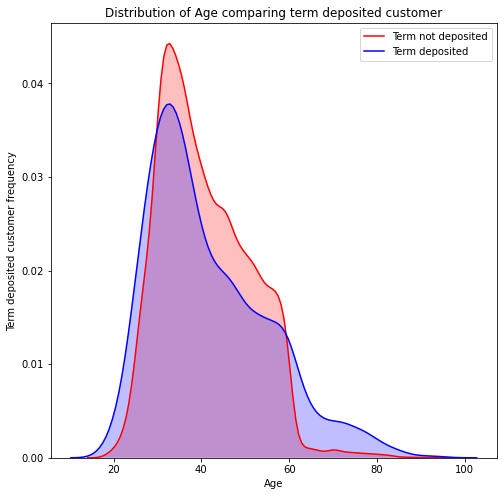

In [8]:
#exploring age variable
g=sn.kdeplot(data.age[(data['y']==0)],color='red',shade=True)
g=sn.kdeplot(data.age[(data['y']==1)],ax=g,color='blue',shade=True)
g.set_xlabel('Age')
g.set_ylabel('Term deposited customer frequency')
plt.title('Distribution of Age comparing term deposited customer')
g=g.legend(['Term not deposited','Term deposited'])

#### bank has maximum customers from 20 to 40 age. 
#### Again customers not opting for term deposites drop drastically after the age of 60 

### Exploring 'Job' variable

In [9]:
pd.crosstab(data.job,data.y)

y,0,1
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


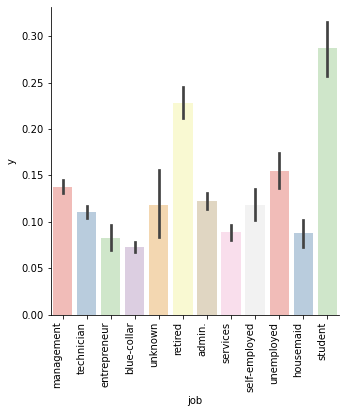

In [10]:
chart=sn.factorplot(y='y',x='job',data=data,kind='bar',palette='Pastel1')
chart.set_xticklabels(rotation=90,horizontalalignment='right')

#### Students and retired are opting more for term deposites, while blue-collar are opting least for term deposites.

### Exploring 'marital' variable

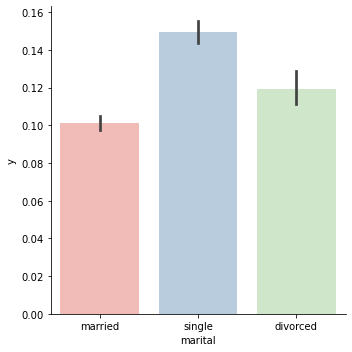

In [11]:
sn.factorplot(y='y',x='marital',data=data,kind='bar',palette='Pastel1')

#### single customers are opting more for term deposites while married are opting less

### Exploring 'education' variable

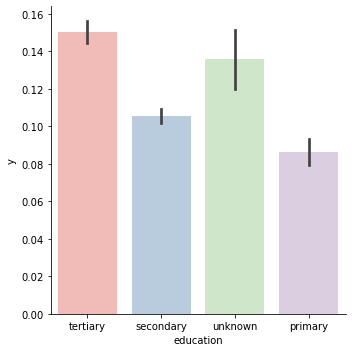

In [12]:
sn.factorplot(y='y',x='education',data=data,kind='bar',palette='Pastel1')

#### Customers with tertiary level education are opting more term deposite option while customerswith primary education are opting less 

### Exploring 'default' variable

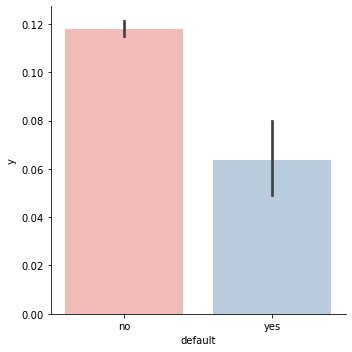

In [13]:
sn.factorplot(y='y',x='default',data=data,kind='bar',palette='Pastel1')

#### customers with existing term deposites are opting less compare to customers without existing term deposites

### Exploring balance variable

In [14]:
data['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

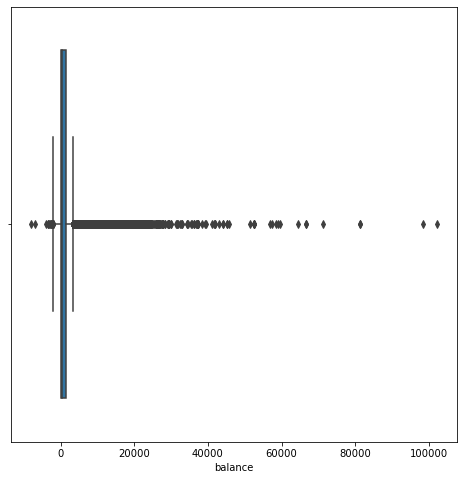

In [15]:
sn.boxplot(data['balance'])

#### many extreme values are visible, which ned to be removed before model building

In [16]:
m=np.mean(data['balance'])
st=np.std(data['balance'])
data=data[(data['balance']>(m-st)) & (data['balance']<=(m+st))] 

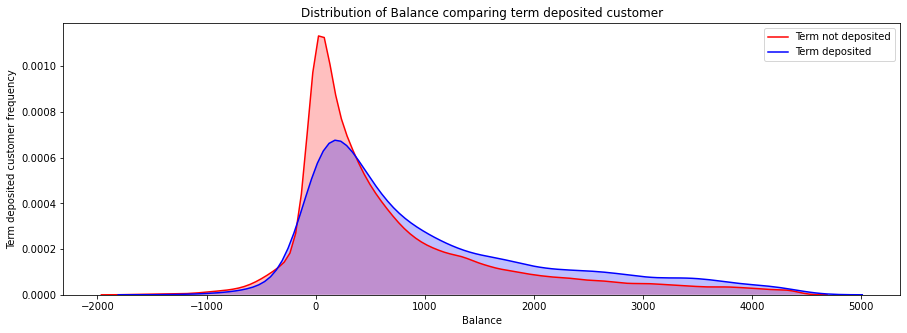

In [17]:
plt.figure(figsize=(15,5))
g=sn.kdeplot(data.balance[(data['y']==0)],color='red',shade=True)
g=sn.kdeplot(data.balance[(data['y']==1)],ax=g,color='blue',shade=True)
g.set_xlabel('Balance')
g.set_ylabel('Term deposited customer frequency')
plt.title('Distribution of Balance comparing term deposited customer')
g=g.legend(['Term not deposited','Term deposited'])

#### customers opting for term deposites increases for the balance more than 500 

#### exploring balance variable against 'age','job','marital','education','default'

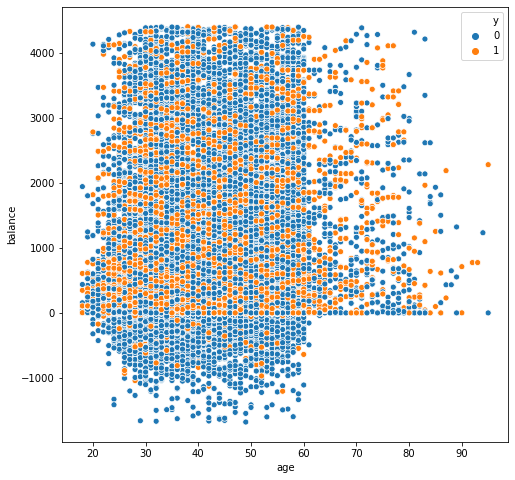

In [18]:
sn.scatterplot(x='age',y='balance',hue='y',data=data)

##### many customers having age below 60 are showing negative balance

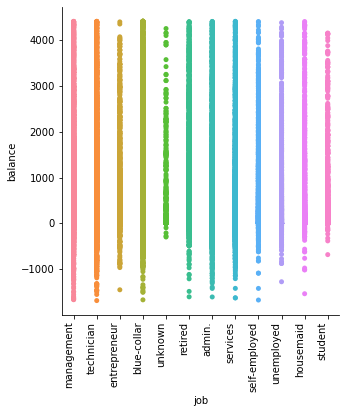

In [19]:
chart=sn.catplot('job','balance',jitter=False,data=data)
chart.set_xticklabels(rotation=90,horizontalalignment='right')

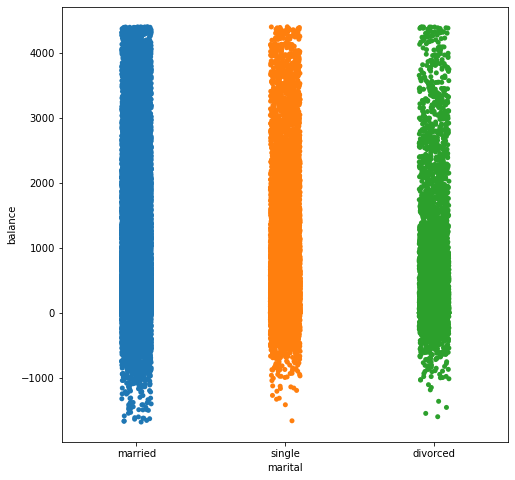

In [20]:
sn.stripplot('marital','balance',data=data)

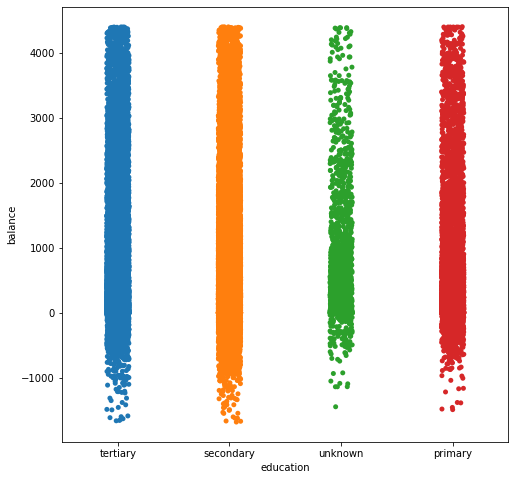

In [21]:
sn.stripplot('education','balance',data=data)

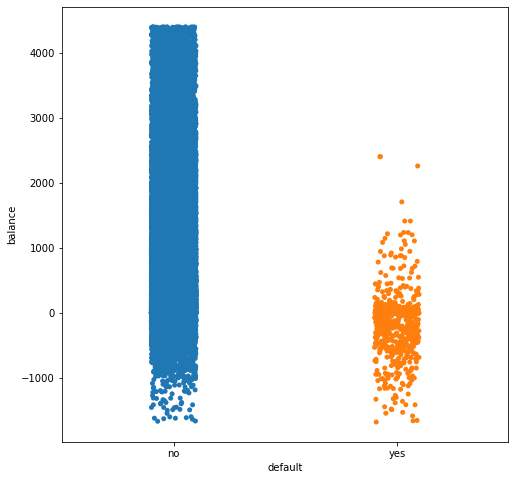

In [22]:
sn.stripplot('default','balance',data=data)

#### bank clients not having credit in default have more balance compare to clients having credit in default

### Exploring 'housing' variable

In [23]:
pd.crosstab(data['housing'],data['y'])

y,0,1
housing,,
no,15283,2979
yes,21704,1770


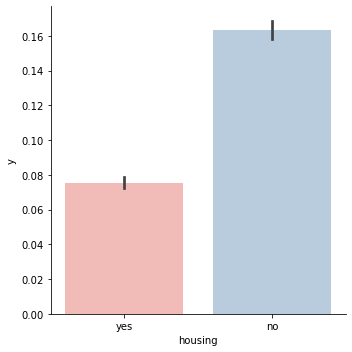

In [24]:
sn.factorplot(y='y',x='housing',data=data,kind='bar',palette='Pastel1')

#### clients not having existing housing loan have subscribed more for a term deposit compare to clients having existing housing loan

### Exploring 'loan' variable

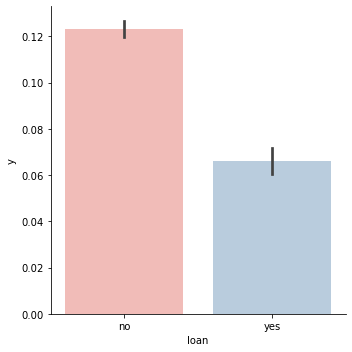

In [25]:
sn.factorplot(y='y',x='loan',data=data,kind='bar',palette='Pastel1')

#### clients not having existing personal loan have subscribed more for a term deposit compare to clients having existing personal loan

### Let's explore variables related with the last contact of the current campaign

#### exploring 'contact' variable

In [26]:
pd.crosstab(data['contact'],data['y'])

y,0,1
contact,,
cellular,23022,3928
telephone,2276,330
unknown,11689,491


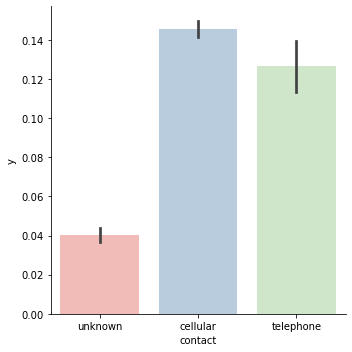

In [27]:
sn.factorplot(y='y',x='contact',data=data,kind='bar',palette='Pastel1')

#### clients communicated through cellular have subscribed more for a term deposit, while clients communicated by means of unknown source have subscibed least.

### Exploring 'day' variable

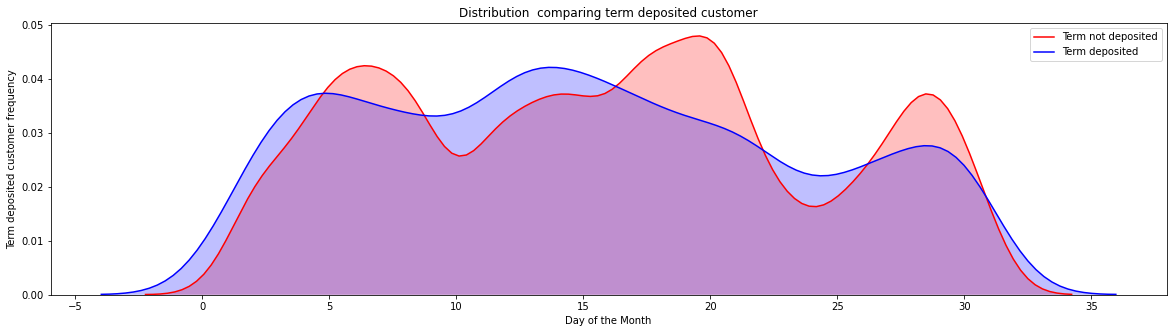

In [28]:
plt.figure(figsize=(20,5))
g=sn.kdeplot(data.day[(data['y']==0)],color='red',shade=True)
g=sn.kdeplot(data.day[(data['y']==1)],ax=g,color='blue',shade=True)
g.set_xlabel('Day of the Month')
g.set_ylabel('Term deposited customer frequency')
plt.title('Distribution  comparing term deposited customer')
g=g.legend(['Term not deposited','Term deposited'])

#### for the clients contacted on  first 5 days of the month, term deposite subscritions are linearly increased
#### pick can be observed in the cleints subscribing term deposites for the contact made between the day 10 to 15
#### after day 15, decline occurs in the clients subscrbing fo term deposites

### Exploring 'month' variable

#### 'month' variable is categorical, let's convert it to numeric

In [29]:
data['month1']=0
data['month1']=data['month1'].astype(int)

In [30]:
data.loc[data['month'].str.contains('jan'),'month1']=1
data.loc[data['month'].str.contains('feb'),'month1']=2
data.loc[data['month'].str.contains('mar'),'month1']=3
data.loc[data['month'].str.contains('apr'),'month1']=4
data.loc[data['month'].str.contains('may'),'month1']=5
data.loc[data['month'].str.contains('jun'),'month1']=6
data.loc[data['month'].str.contains('jul'),'month1']=7
data.loc[data['month'].str.contains('aug'),'month1']=8
data.loc[data['month'].str.contains('sep'),'month1']=9
data.loc[data['month'].str.contains('oct'),'month1']=10
data.loc[data['month'].str.contains('nov'),'month1']=11
data.loc[data['month'].str.contains('dec'),'month1']=12

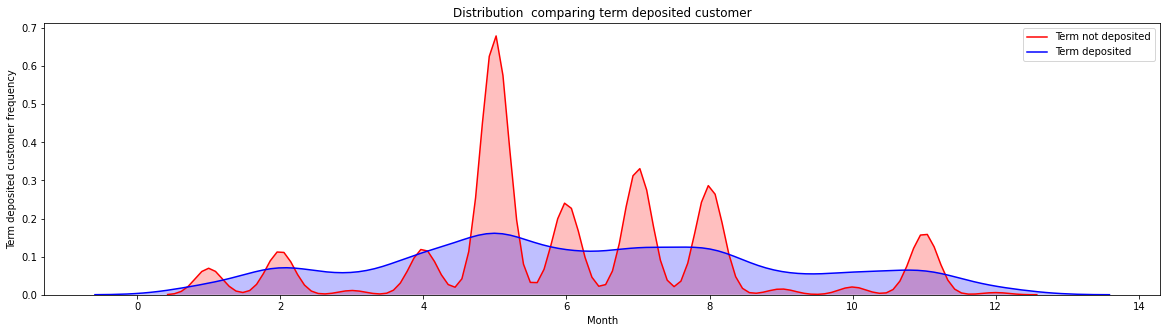

In [31]:
plt.figure(figsize=(20,5))
g=sn.kdeplot(data.month1[(data['y']==0)],color='red',shade=True)
g=sn.kdeplot(data.month1[(data['y']==1)],ax=g,color='blue',shade=True)
g.set_xlabel('Month')
g.set_ylabel('Term deposited customer frequency')
plt.title('Distribution  comparing term deposited customer')
g=g.legend(['Term not deposited','Term deposited'])

#### for the clients contacted in the month of march, sept and oct, maximum clients sbscribed a term deposite out of total clients contacted
#### for the clients contacted in the month of may, lowest clients subscribed for term deposite out of total clients contacted

In [32]:
data['month']=data['month1']

### Exploring 'duration' variable

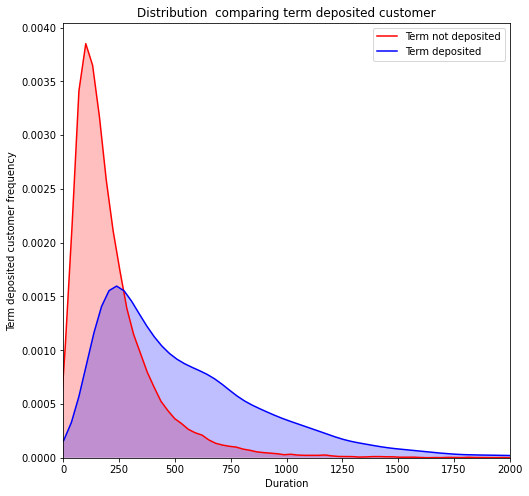

In [33]:
plt.xlim(0,2000)
g=sn.kdeplot(data.duration[(data['y']==0)],color='red',shade=True)
g=sn.kdeplot(data.duration[(data['y']==1)],ax=g,color='blue',shade=True)
g.set_xlabel('Duration')
g.set_ylabel('Term deposited customer frequency')
plt.title('Distribution  comparing term deposited customer')
g=g.legend(['Term not deposited','Term deposited'])

#### maximum clients subscribed a term deposit when last contact duration was 250 seconds.

### Performing EDA on other attributes

### Analysing 'campaign' variable

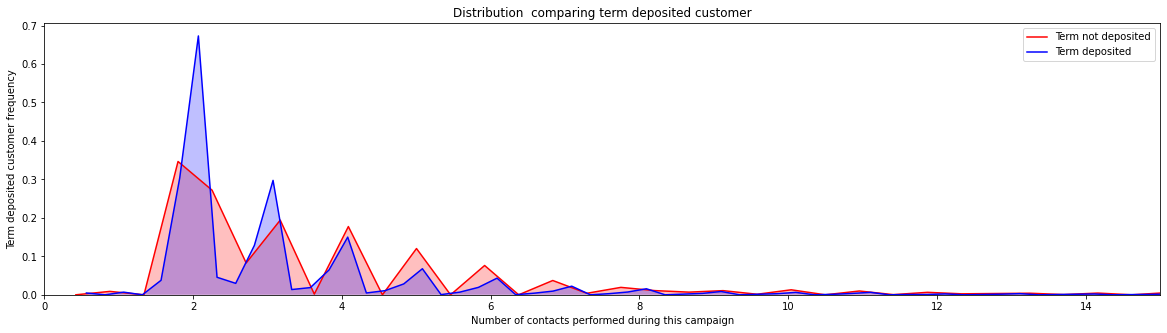

In [34]:
plt.figure(figsize=(20,5))
plt.xlim(0,15)
g=sn.kdeplot(data.campaign[(data['y']==0)],color='red',shade=True)
g=sn.kdeplot(data.campaign[(data['y']==1)],ax=g,color='blue',shade=True)
g.set_xlabel('Number of contacts performed during this campaign')
g.set_ylabel('Term deposited customer frequency')
plt.title('Distribution  comparing term deposited customer')
g=g.legend(['Term not deposited','Term deposited'])

#### Maximum clients subscribed a term deposit when the client contacts performed twice during the campaign.
#### Count of client subscribed a term deposit decreases as the contact performed increases  beyond 3

### Exploring 'pdays' variable

Text(0.5, 1.0, 'Distribution  comparing term deposited customer')

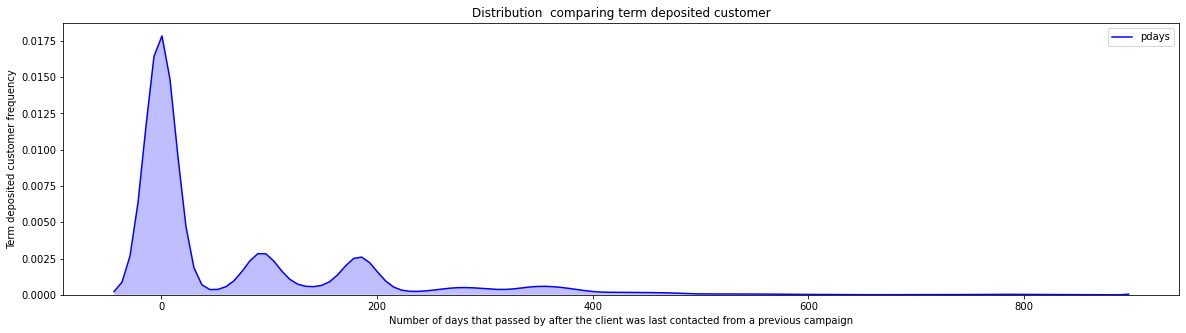

In [35]:
plt.figure(figsize=(20,5))
g=sn.kdeplot(data.pdays[(data['y']==1)],color='blue',shade=True)
g.set_xlabel('Number of days that passed by after the client was last contacted from a previous campaign')
g.set_ylabel('Term deposited customer frequency')
plt.title('Distribution  comparing term deposited customer')

#### Maximum clients subscribed a term deposit when the client was not previously contacted

### Exploring 'previous' variable

Text(0.5, 1.0, 'Distribution  comparing term deposited customer')

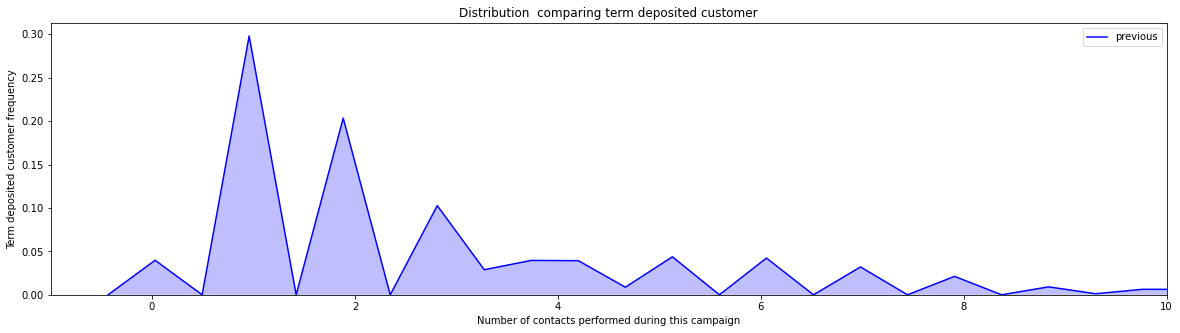

In [36]:
plt.figure(figsize=(20,5))
plt.xlim(-1,10)
g=sn.kdeplot(data.previous[(data['y']==1)],color='blue',shade=True)
g.set_xlabel('Number of contacts performed during this campaign')
g.set_ylabel('Term deposited customer frequency')
plt.title('Distribution  comparing term deposited customer')

#### Maximum clients subscribed a term deposit when only once time previous contacts performed before this campaign

### Exploring poutcomes variable

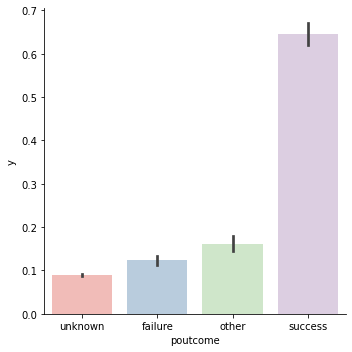

In [37]:
sn.factorplot(y='y',x='poutcome',data=data,kind='bar',palette='Pastel1')

#### Maximum clients subscribed a term deposit when outcome of the previous marketing campaign was a success

In [38]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,month1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0,5


In [39]:
data=data.drop(['month1'],axis=1)

In [40]:
x=data.iloc[:,:-1]
y=data.y

In [41]:
x=pd.concat((x.select_dtypes(include=['object']),x.select_dtypes(exclude=['object'])),axis=1)

In [42]:
x.head()

,job,marital,education,default,housing,loan,contact,poutcome,age,balance,day,month,duration,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,unknown,unknown,58,2143,5,5,261,1,-1,0
1,technician,single,secondary,no,yes,no,unknown,unknown,44,29,5,5,151,1,-1,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,unknown,33,2,5,5,76,1,-1,0
3,blue-collar,married,unknown,no,yes,no,unknown,unknown,47,1506,5,5,92,1,-1,0
4,unknown,single,unknown,no,no,no,unknown,unknown,33,1,5,5,198,1,-1,0


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
x.loc[:,'job':'poutcome']=x.loc[:,'job':'poutcome'].apply(LabelEncoder().fit_transform)

In [45]:
x.head()

,job,marital,education,default,housing,loan,contact,poutcome,age,balance,day,month,duration,campaign,pdays,previous
0,4,1,2,0,1,0,2,3,58,2143,5,5,261,1,-1,0
1,9,2,1,0,1,0,2,3,44,29,5,5,151,1,-1,0
2,2,1,1,0,1,1,2,3,33,2,5,5,76,1,-1,0
3,1,1,3,0,1,0,2,3,47,1506,5,5,92,1,-1,0
4,11,2,3,0,0,0,2,3,33,1,5,5,198,1,-1,0


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [47]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,max_depth=5,random_state=15)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=15)

In [48]:
model.score(x_train,y_train)

0.8984964657960944

In [49]:
prediction=model.predict(x_test)

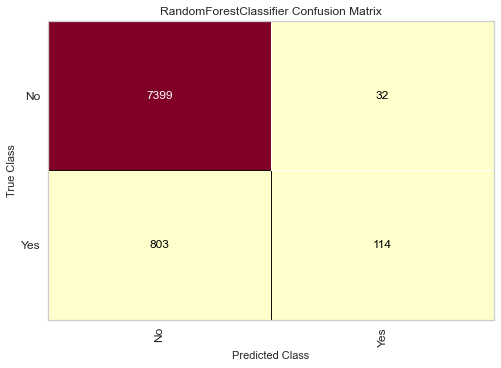

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000000001174C908>,
                classes=['No', 'Yes'],
                cmap=<matplotlib.colors.ListedColormap object at 0x0000000011781508>,
                model=None)

In [50]:
from yellowbrick.classifier import confusion_matrix
confusion_matrix(model,x_train,y_train,x_test,y_test,classes=['No','Yes'])

### Lets evaluate quality of classifier

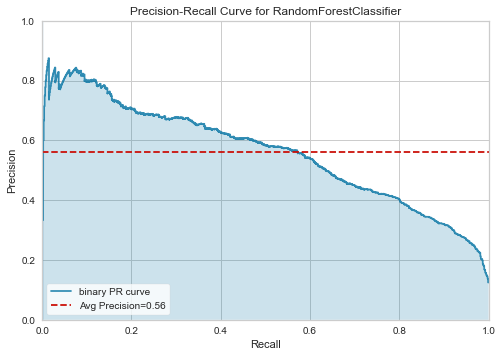

In [51]:
from yellowbrick.classifier import PrecisionRecallCurve
viz=PrecisionRecallCurve(model)
viz.fit(x_train,y_train)
viz.score(x_test,y_test)
viz.show()

#### it can be observe that avg. precision is 56% as our target class is very inbalance 

#### therefore perfoming SMOTE is essential

In [52]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_SMOTE,Y_SMOTE=smote.fit_sample(x,y)

In [53]:
from collections import Counter
print('Before SMOTE:',Counter(y))
print('After SMOTE:',Counter(Y_SMOTE))

Before SMOTE: Counter({0: 36987, 1: 4749})
After SMOTE: Counter({0: 36987, 1: 36987})


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_SMOTE,Y_SMOTE,test_size=0.2,random_state=10)

In [55]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,max_depth=5,random_state=15)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=15)

In [56]:
model.score(x_train,y_train)

0.8770171851501377

In [57]:
prediction=model.predict(x_test)

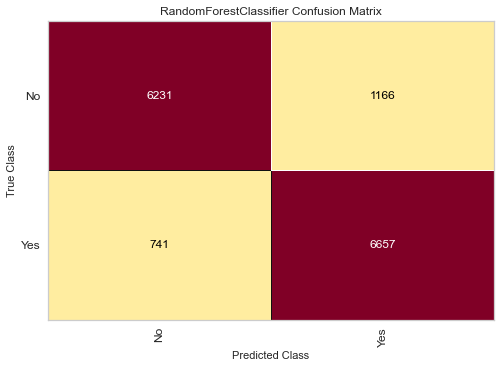

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011575708>,
                classes=['No', 'Yes'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000000000D5BF5C8>,
                model=None)

In [58]:
from yellowbrick.classifier import confusion_matrix
confusion_matrix(model,x_train,y_train,x_test,y_test,classes=['No','Yes'])

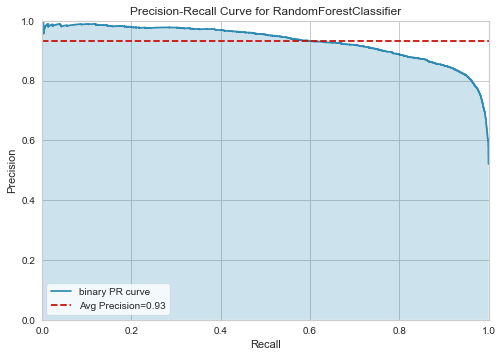

In [59]:
from yellowbrick.classifier import PrecisionRecallCurve
viz=PrecisionRecallCurve(model)
viz.fit(x_train,y_train)
viz.score(x_test,y_test)
viz.show()

#### Avg precision of our classifier has been increased to 93% from 56% after SMOTE

### Lets perform crossfold validation now

In [60]:
from sklearn.model_selection import cross_val_score
clf_score=cross_val_score(model,x_train,y_train,cv=4)
print(clf_score)
clf_score.mean()

[0.86988848 0.87718824 0.87225414 0.87596323]


0.8738235208385998

### Lets perform dimensionality reduction using PCA

#### we will perform z-score transformation before PCA analysis as PCA's output is influenced by the scale of fetures

In [61]:
#z-score transformation
from scipy.stats import zscore
x_std=x.apply(zscore)

In [62]:
x_std

,job,marital,education,default,housing,loan,contact,poutcome,age,balance,day,month,duration,campaign,pdays,previous
0,-0.096163,-0.274175,1.056424,-0.139973,0.882024,-0.447715,1.502173,0.441250,1.646689,1.400530,-1.290674,-0.457136,0.016251,-0.570550,-0.408774,-0.247007
1,1.423861,1.362641,-0.286706,-0.139973,0.882024,-0.447715,1.502173,0.441250,0.313588,-0.710124,-1.290674,-0.457136,-0.413714,-0.570550,-0.408774,-0.247007
2,-0.704173,-0.274175,-0.286706,-0.139973,0.882024,2.233564,1.502173,0.441250,-0.733849,-0.737081,-1.290674,-0.457136,-0.706872,-0.570550,-0.408774,-0.247007
3,-1.008178,-0.274175,2.399554,-0.139973,0.882024,-0.447715,1.502173,0.441250,0.599253,0.764538,-1.290674,-0.457136,-0.644332,-0.570550,-0.408774,-0.247007
4,2.031870,1.362641,2.399554,-0.139973,-1.133755,-0.447715,1.502173,0.441250,-0.733849,-0.738080,-1.290674,-0.457136,-0.230001,-0.570550,-0.408774,-0.247007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,1.423861,1.362641,-0.286706,-0.139973,-1.133755,2.233564,-0.716872,0.441250,-1.495621,-0.234878,0.145428,2.079576,0.504848,-0.248521,-0.408774,-0.247007
45206,1.423861,-0.274175,1.056424,-0.139973,-1.133755,-0.447715,-0.716872,0.441250,0.980139,0.084616,0.145428,2.079576,2.814934,0.073509,-0.408774,-0.247007
45207,0.207841,-1.910992,-1.629836,-0.139973,-1.133755,-0.447715,-0.716872,0.441250,2.884569,0.987185,0.145428,2.079576,0.778462,-0.248521,-0.408774,-0.247007
45209,-1.008178,-0.274175,-0.286706,-0.139973,-1.133755,-0.447715,0.392650,0.441250,1.551468,-0.072136,0.145428,2.079576,0.981719,0.395539,-0.408774,-0.247007


In [63]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=16)

In [64]:
pca.fit_transform(x_std)
print(pca.explained_variance_ratio_)

[0.14966077 0.09787057 0.09385049 0.07753038 0.07000847 0.06302098
 0.05930586 0.05778953 0.0546296  0.05195559 0.05143113 0.04931427
 0.04492627 0.03757681 0.0326332  0.00849607]


#### It can be observe that first 15 features are describing 99% variation in the data
#### Lets use first 15 variables to build out model

In [65]:
0.14966077+0.09787057+0.09385049+0.07753038+0.07000847+0.06302098+0.05930586+0.05778953+0.0546296+0.05195559+0.05143113+0.04931427+0.04492627+0.03757681+0.0326332

0.9915039200000001

In [66]:
x=x.loc[:,'job':'pdays']
x.head()

,job,marital,education,default,housing,loan,contact,poutcome,age,balance,day,month,duration,campaign,pdays
0,4,1,2,0,1,0,2,3,58,2143,5,5,261,1,-1
1,9,2,1,0,1,0,2,3,44,29,5,5,151,1,-1
2,2,1,1,0,1,1,2,3,33,2,5,5,76,1,-1
3,1,1,3,0,1,0,2,3,47,1506,5,5,92,1,-1
4,11,2,3,0,0,0,2,3,33,1,5,5,198,1,-1


In [67]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_SMOTE,Y_SMOTE=smote.fit_sample(x,y)

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_SMOTE,Y_SMOTE,test_size=0.2,random_state=10)

In [69]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,max_depth=5,random_state=15)
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.8760540056438939

#### we have succesfully reduced dimension's of our model without compromising model accuracy